# Predicting Mental Health Performance
We create models to predict mental health performance using other features.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
# use cleaned dataset
df = pd.read_csv('data/CitieSHealth_BCN_DATA_PanelStudy_20220414_Clean.csv')
df.head()

,no2,pm25,black carbon,performance,occurrence_mental,wellbeing,stress,sleep quality,gender,diet,alcohol,drug_use,education,access_greenbluespaces,smoke,age
0,28.54,8.16,0.50,51.24,2,8,5,8,Female,Yes,No,No,university,Yes,No,37
1,44.51,13.38,1.51,56.01,10,9,8,9,Female,Yes,Yes,No,university,Yes,Yes,28
2,33.81,16.53,1.17,58.18,14,3,5,2,Female,Yes,No,No,university,Yes,No,29
3,37.86,15.67,1.21,71.48,12,9,6,2,Female,No,Yes,No,university,Yes,No,33
4,37.82,18.45,1.56,46.05,9,3,5,10,Female,Yes,Yes,No,baccalaureate,No,No,45


In [17]:
numerical = list((df.dtypes[df.dtypes == 'float64'].index) | (df.dtypes[df.dtypes == 'int64'].index))
categorical = list((df.dtypes[df.dtypes != 'float64'].index) & (df.dtypes[df.dtypes != 'int64'].index))
categorical

/tmp/ipykernel_557/2363933795.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  numerical = list((df.dtypes[df.dtypes == 'float64'].index) | (df.dtypes[df.dtypes == 'int64'].index))
/tmp/ipykernel_557/2363933795.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  categorical = list((df.dtypes[df.dtypes != 'float64'].index) & (df.dtypes[df.dtypes != 'int64'].index))


['gender',
 'diet',
 'alcohol',
 'drug_use',
 'education',
 'access_greenbluespaces',
 'smoke']

In [4]:
def ohe(data, column):
    enc = OneHotEncoder()
    enc.fit(data[column])
    encoded_data = pd.DataFrame(enc.transform(data[column]).toarray().astype(int))
    encoded_data.columns = enc.get_feature_names_out()
    encoded_data = encoded_data.set_index(data.index)
    return encoded_data

In [5]:
ohe_df = pd.concat([df[numerical], ohe(df[categorical], categorical)], axis=1)
ohe_df.head()

,age,black carbon,no2,occurrence_mental,performance,pm25,sleep quality,stress,wellbeing,gender_Female,...,alcohol_Yes,drug_use_No,drug_use_Yes,education_baccalaureate,education_primary or less,education_university,access_greenbluespaces_No,access_greenbluespaces_Yes,smoke_No,smoke_Yes
0,37,0.50,28.54,2,51.24,8.16,8,5,8,1,...,0,1,0,0,0,1,0,1,1,0
1,28,1.51,44.51,10,56.01,13.38,9,8,9,1,...,1,1,0,0,0,1,0,1,0,1
2,29,1.17,33.81,14,58.18,16.53,2,5,3,1,...,0,1,0,0,0,1,0,1,1,0
3,33,1.21,37.86,12,71.48,15.67,2,6,9,1,...,1,1,0,0,0,1,0,1,1,0
4,45,1.56,37.82,9,46.05,18.45,10,5,3,1,...,1,1,0,1,0,0,1,0,1,0


In [6]:
X = ohe_df.drop('performance', axis=1)
y = ohe_df['performance']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Linear Regression

In [8]:
model = LinearRegression().fit(X_train, y_train)

In [9]:
print('model intercept :', model.intercept_)
print('model coefficients : ', model.coef_)
print('Model score : ', model.score(X, y))

model intercept : 58.31824436597431
model coefficients :  [-0.44714672  1.42349775 -0.03183401  0.76227076 -0.11147233 -0.01605531
 -0.57671488 -0.00766175 -0.25765266  0.25765266 -0.96103905  0.96103905
 -0.06319105  0.06319105  2.95368591 -2.95368591 -0.91066547 -1.62917906
  2.53984453 -0.29977911  0.29977911 -0.44647134  0.44647134]
Model score :  0.28852599872359175


In [10]:
y_pred = model.predict(X_test)

In [11]:
mean_squared_error(y_test, y_pred)

77.90279867037849

## Random Forest

In [12]:
model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [13]:
mean_squared_error(y_test, y_pred)

76.09344734223899

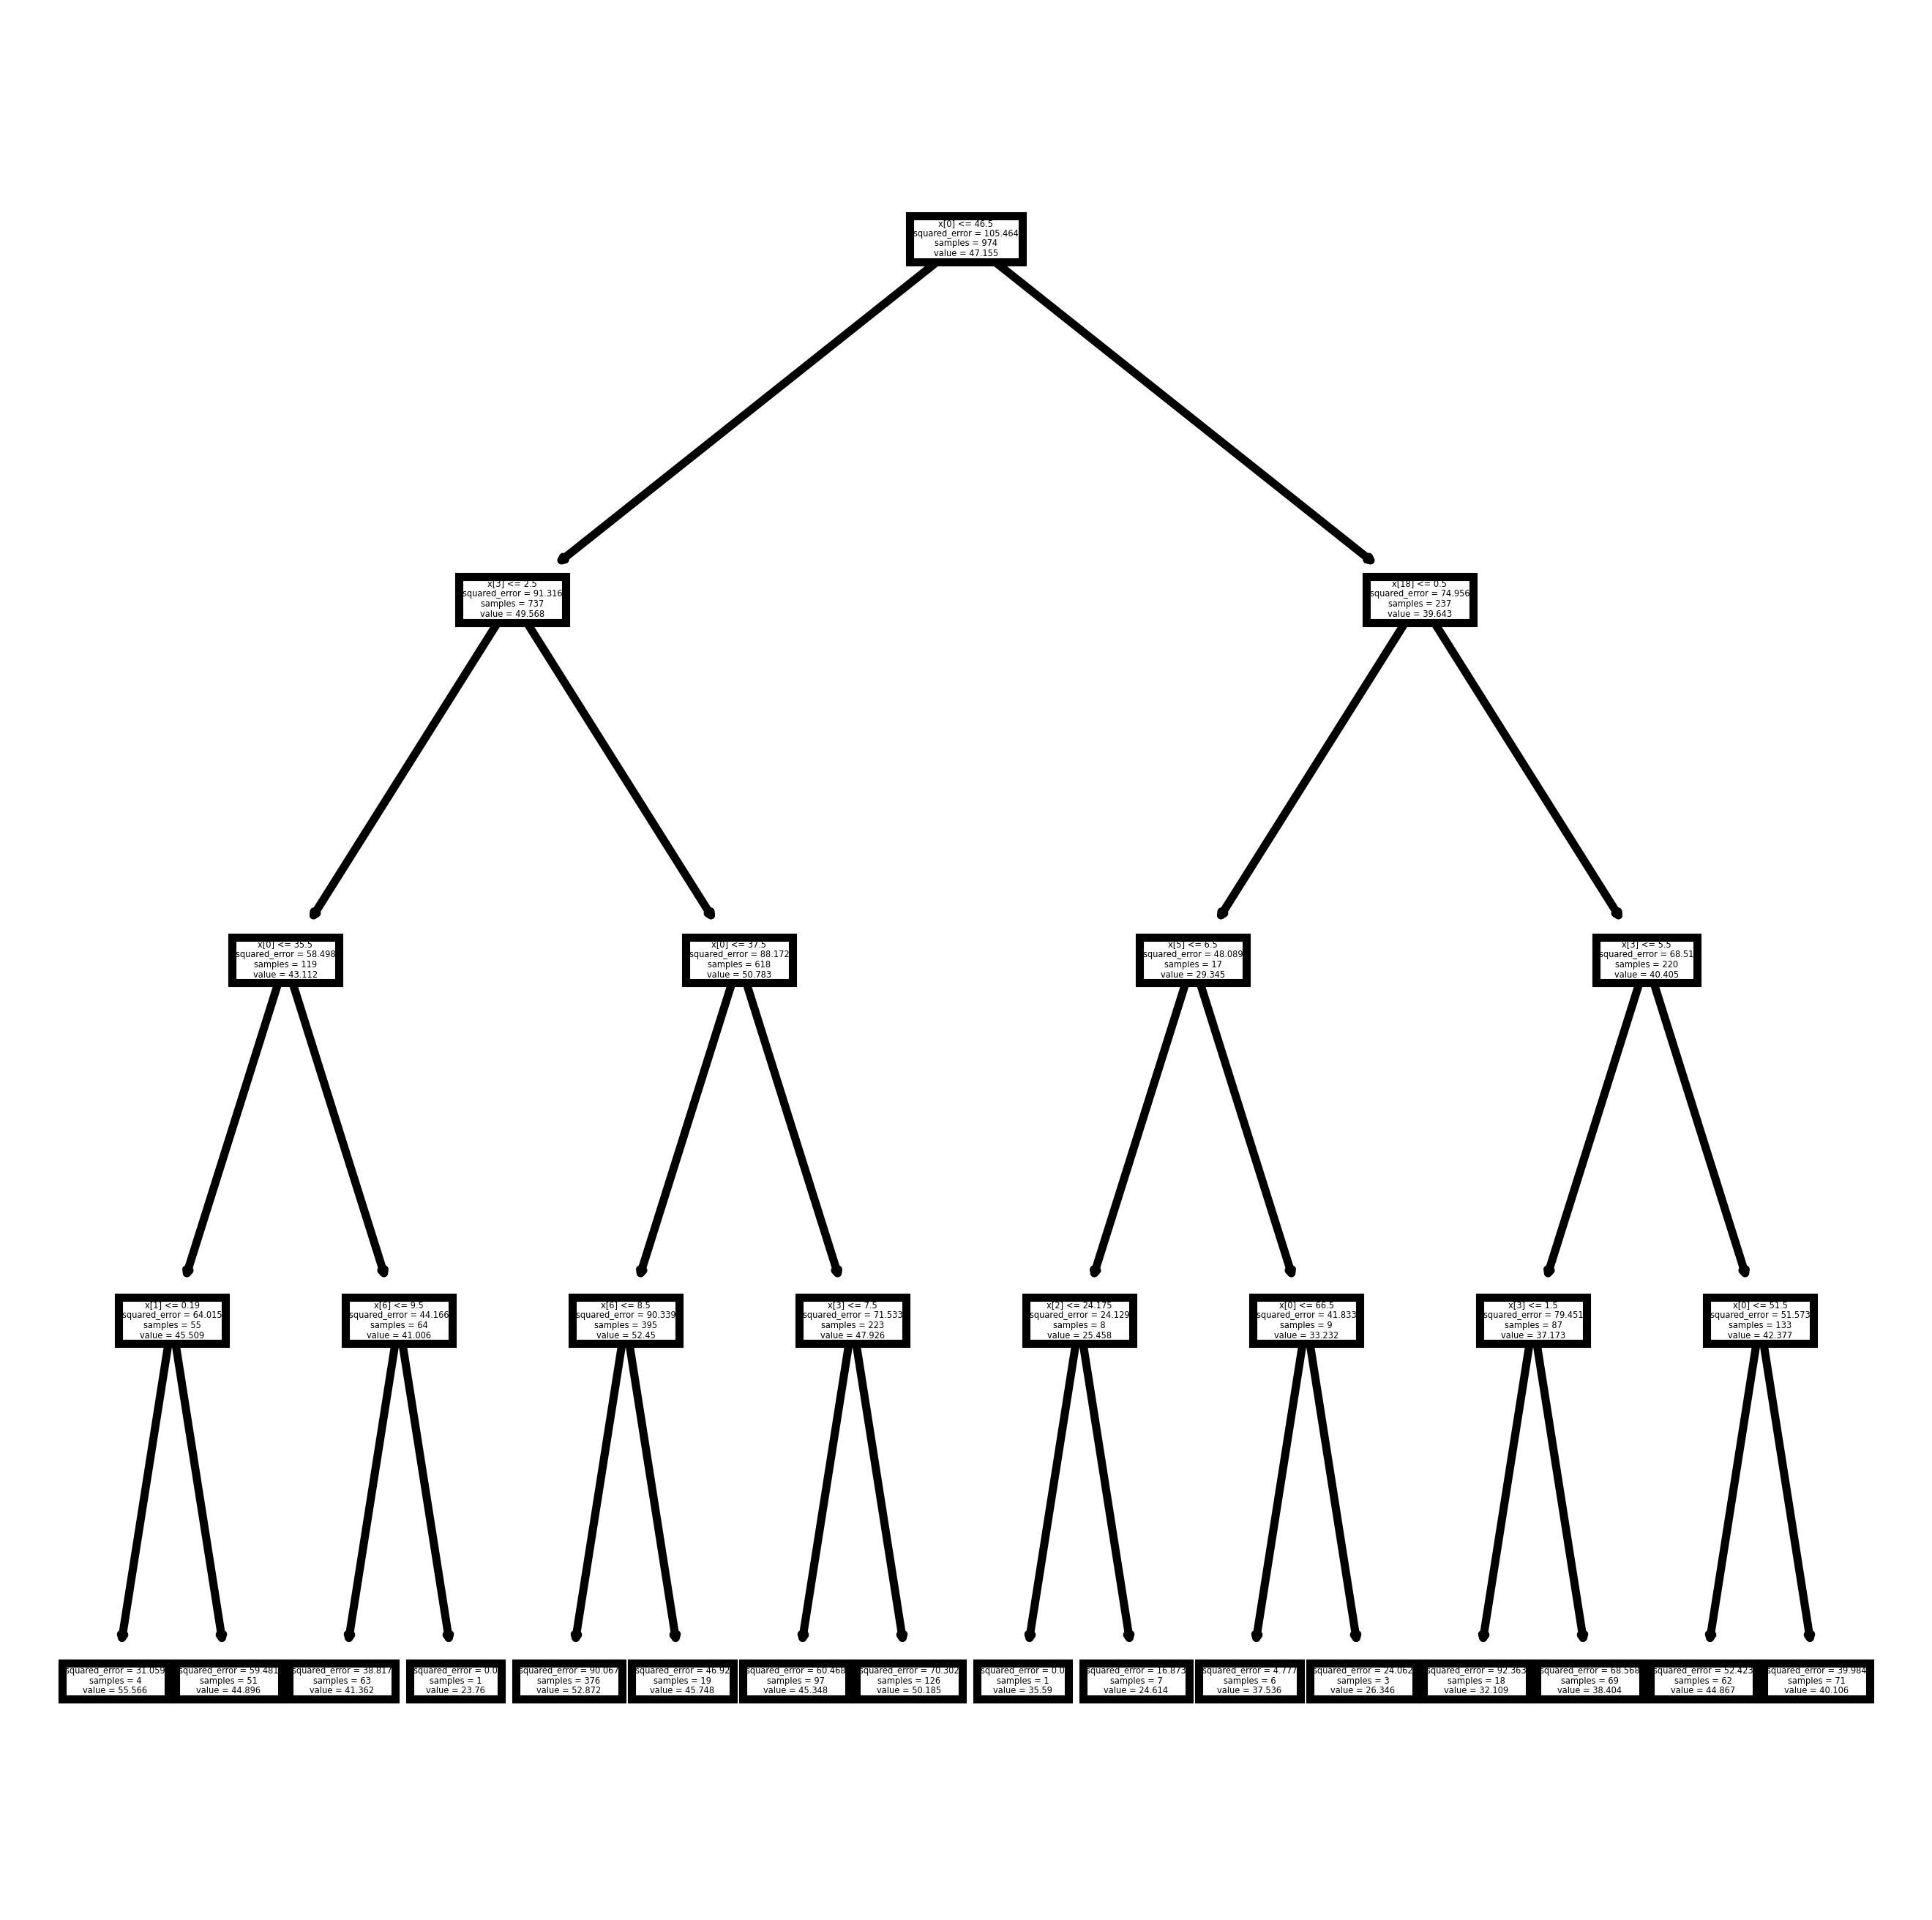

In [14]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0]);